# Census Income Project

### Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).

### TARGET

The prediction task is to determine whether a person makes over $50K a year.

WORK:

1) IMPORTING LIBRARIES

2) LOADING DATASET & DESCRIPTION

3) DATA PREPROCESSING OF DATA

4) EXPLORATORY DATA ANALYSIS

5) SPLITING DATA AND APPLYING train_test_split

6) FINDING BEST RANDOM STATE

7) FINDING BEST ALGORITHM

8) GRID SEARCH CV

9) TUNNING WITH BEST PARAMETERS

10) AUC_ROC CURVE

11) SAVING OUR MODEL

12) RESULTS & CONCLUSION

##### In this context, the use classification models to predict whether a person makes over $50K a year. 

In [1]:
# importing libraries

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
## load the data into a pandas dataframe using the read_csv function.

df = pd.read_csv("Census Income.csv") 

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.size

488400

In [5]:
# looking top 10 rows

df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [6]:
#l looking last 10 rows

df.tail(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32550,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32551,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32552,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32553,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:
df.shape

(32560, 15)

In [8]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

### Attributes:

Attributes age, hours-per-week are already self-explanatory.

fnlwgt-----> sampling weight

education-num---->number of years of education.

capital-gain---->Income gain from investment sources other than salary/wages.

Capital_loss---->Income loss from investment sources other than salary/wages.


In [9]:
df.columns.size

15

In [10]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

# DESCRIBING DATA

The measures of central tendency and distribution are some measures to define the data set.

The measures used to define the central tendency are mean, median and mode.

The standard deviations (or variance) are the minimum and maximum values of variables. The table below is a summary of some statistical measures for each numeric predictor of the dataset:

mean: It indicates the average value around which each group of attributes is attested.

std (Standard Deviation): It indicates the standard deviation of each attribute group, from which we can guess the degree of data dispersion around the average.

max and min indicate the attribute that I assume the highest and lowest value for each attribute group.

In [11]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


describe function only shows the variable which are numeric.

That's why our target varaible i.e. Income is not showing beacuse it is given in object format.

# EXPLORATORY DATA ANALYSIS

In [11]:
# Look at the values in each columns 
for i in df:
    print(df[i].value_counts())
    print("____________________________________________________________")

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: Age, Length: 73, dtype: int64
____________________________________________________________
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
____________________________________________________________
123011    13
203488    13
164190    13
121124    12
148995    12
          ..
68318      1
284211     1
312881     1
177711     1
229376     1
Name: Fnlwgt, Length: 21647, dtype: int64
____________________________________________________________
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-

There are 32561 samples in the dataset.

Both categorical and numerical columns are present in the dataset.

Attributes workClass, occupation, native-country have Nan values.

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

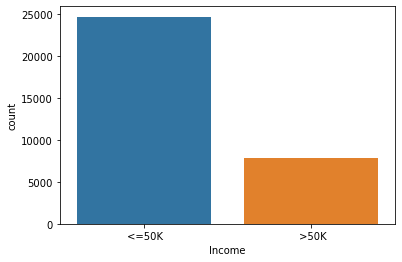

In [13]:
#Get the count of Loan Approved(our target variable)

sns.countplot(x = 'Income', data = df)
df["Income"].value_counts()

People having Income less than 50K are more in number.

## Univariate analysis of independent varaible which are Categorical in nature:

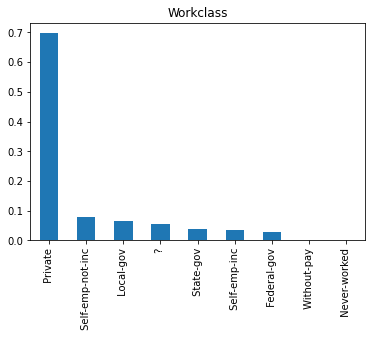

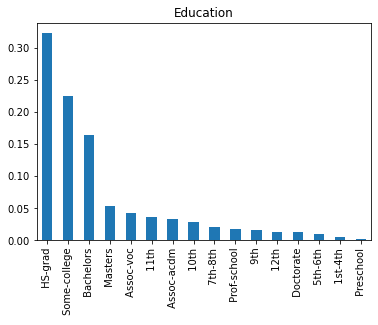

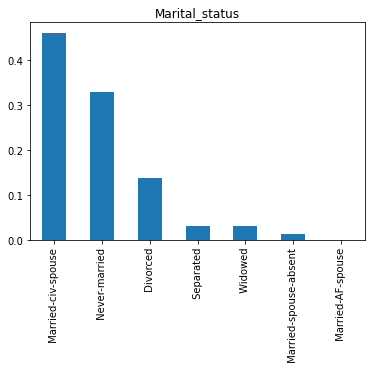

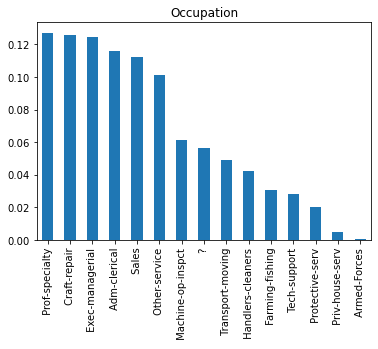

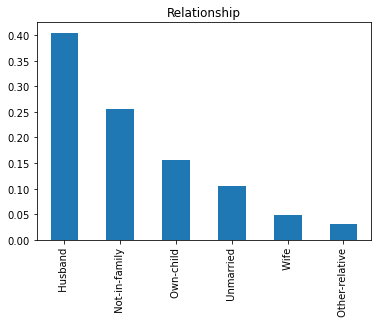

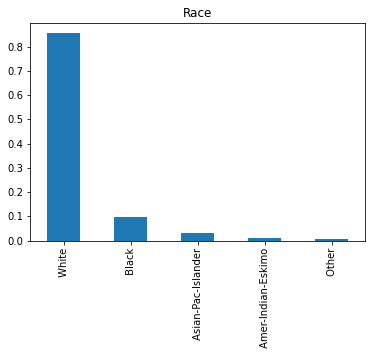

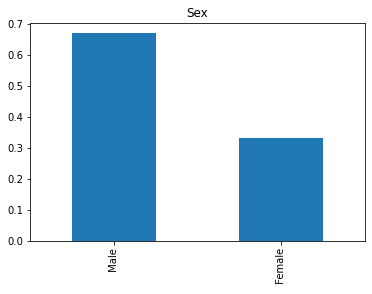

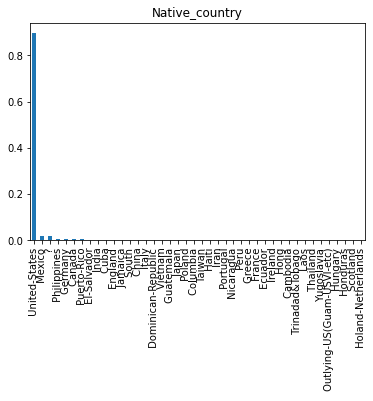

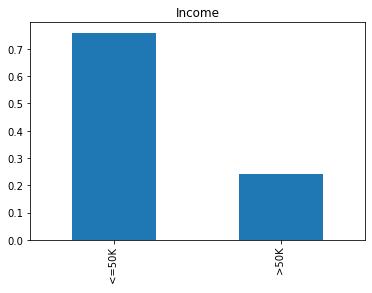

In [12]:
for i in df.columns:
    if df[i].dtypes== "object":
        df[i].value_counts(normalize=True).plot.bar(figsize=(6,4), title=i)
        plt.show() 

OBSERVATIONS:

1) Most of the people are working in Private sector.

2) Most of people have degree as HS-grad.

3) 45% of people are married.

4) 85% people are from White Race.

5) 70% are males in data.

6) 85% are US people.


### Analysis of Independent Variable which are Categorical in nature with Target variable:

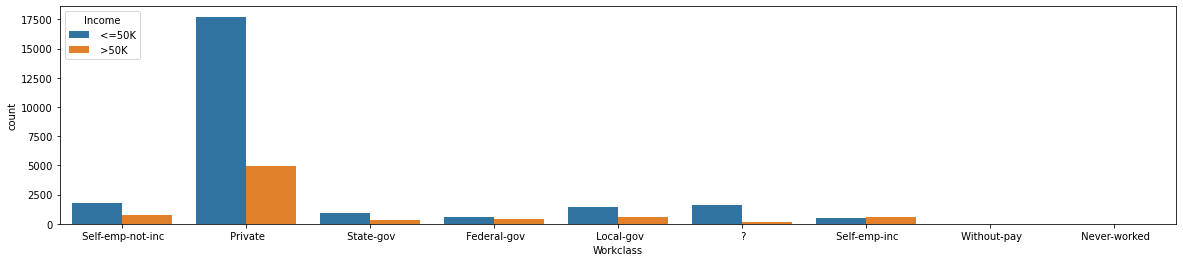

In [13]:
plt.subplots(figsize=(20,4))
sns.countplot(x="Workclass",hue="Income",data=df)

Most of the people are working in Private sectore with less than 50K income.

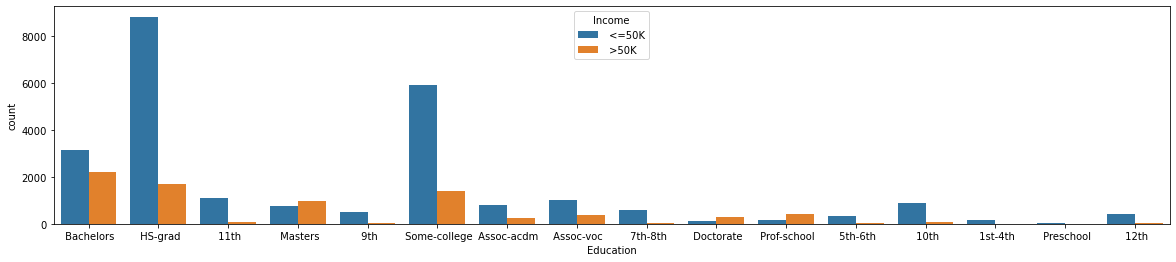

In [16]:
plt.subplots(figsize=(20,4))
sns.countplot(x="Education",hue="Income",data=df)

Most of the people are having degree as HS-grad and earning less than 50K income.

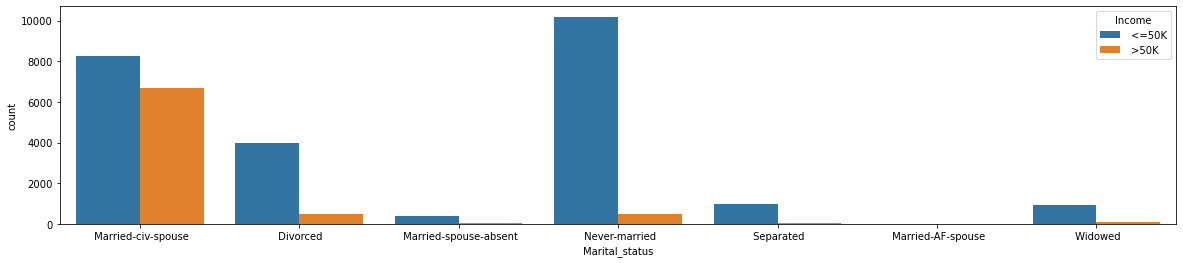

In [17]:
plt.subplots(figsize=(20,4))
sns.countplot(x="Marital_status",hue="Income",data=df)

Unmarried people are more and they are earning less than 50K.

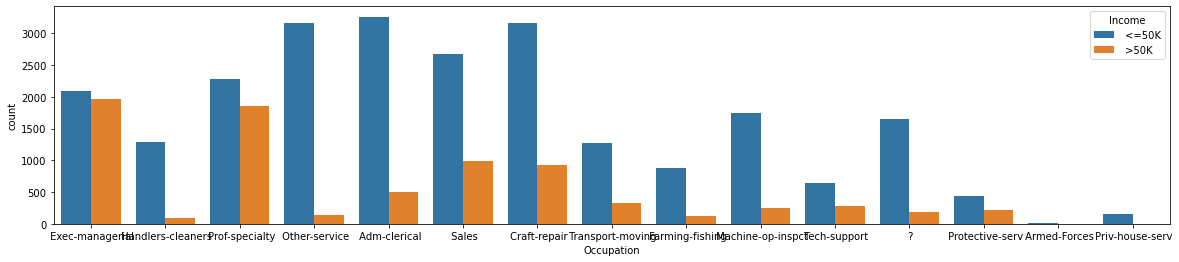

In [18]:
plt.subplots(figsize=(20,4))
sns.countplot(x="Occupation",hue="Income",data=df)

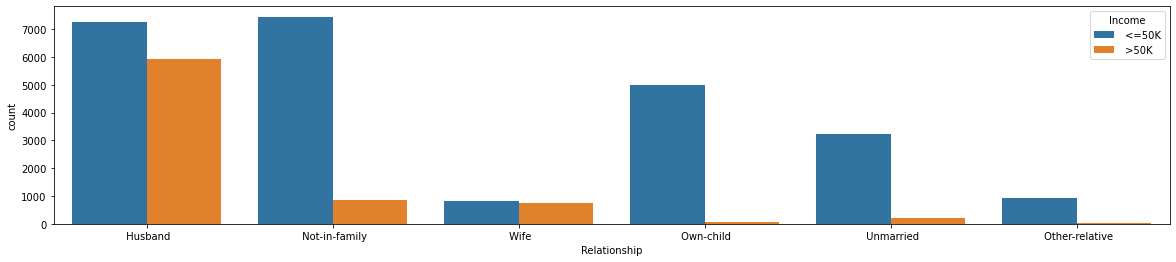

In [19]:
plt.subplots(figsize=(20,4))
sns.countplot(x="Relationship",hue="Income",data=df)

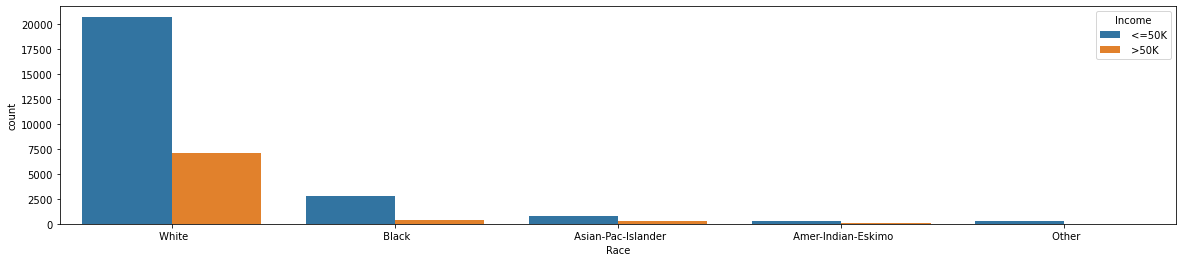

In [20]:
plt.subplots(figsize=(20,4))
sns.countplot(x="Race",hue="Income",data=df)

Most of people belong to White Race and earning less than 50k.

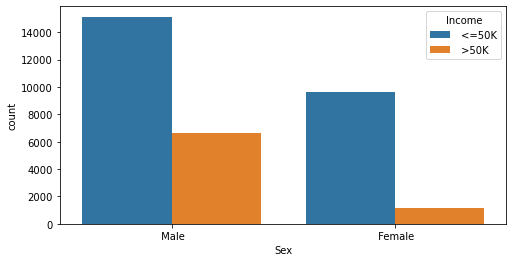

In [21]:
plt.subplots(figsize=(8,4))
sns.countplot(x="Sex",hue="Income",data=df)

Males are more and more than 60% are earning less than 50K.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

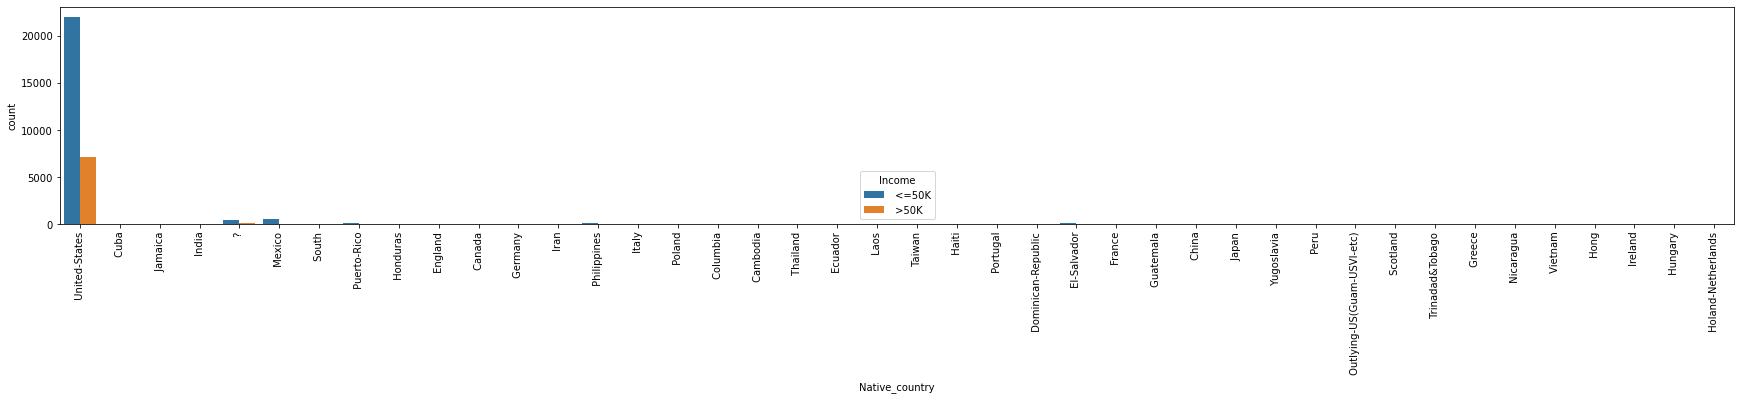

In [14]:
plt.subplots(figsize=(30,4))
sns.countplot(x="Native_country",hue="Income",data=df)
plt.xticks(rotation = 90)

85% people are from US and around 65% are earning less than 50K.

## Analysis of Variable which are Continous:

In [23]:
# we use histogram for showing our continous variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000241760DCF40>,
      dtype=object)

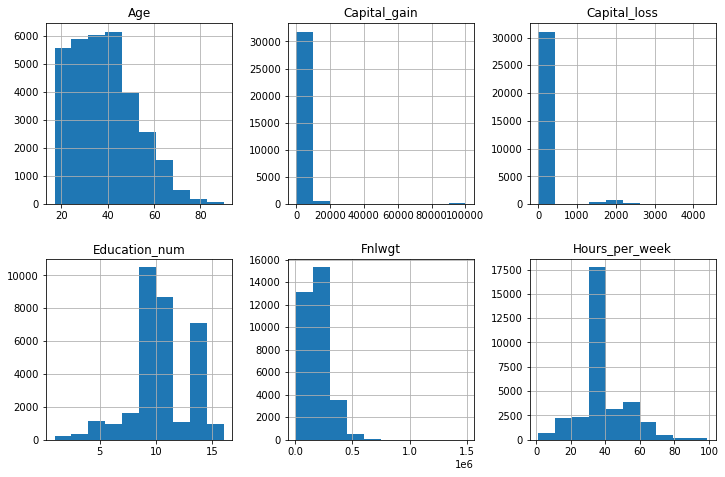

In [24]:
df.hist(figsize=(12,12), layout=(3,3),sharex=False)

we can visualize that skewness is present in all variables.
we will deal with it later.

# DATA PREPROCESSING

### checking missing values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [16]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

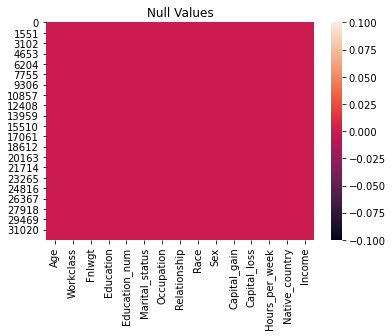

In [17]:
# visualizing null values through heat-map

sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

NO MISSING VALUES PRESENT

The variables workClass, occupation, native-country have "?" values. We will replace ? values in each column with the most_frequent occurring value of that column.

In [18]:
## replacing ? with NaN

print (df.shape)
df['Native_country'] = df['Native_country'].replace(' ?',np.nan)
df['Workclass'] = df['Workclass'].replace(' ?',np.nan)
df['Occupation'] = df['Occupation'].replace(' ?',np.nan)


## filling null values with mode
df['Workclass']=df['Workclass'].fillna(df['Workclass'].mode()[0])
df['Occupation']=df['Occupation'].fillna(df['Occupation'].mode()[0])
df['Native_country']=df['Native_country'].fillna(df['Native_country'].mode()[0])

print (df.shape)
print (df.head(10))

(32560, 15)
(32560, 15)
   Age          Workclass  Fnlwgt      Education  Education_num  \
0   50   Self-emp-not-inc   83311      Bachelors             13   
1   38            Private  215646        HS-grad              9   
2   53            Private  234721           11th              7   
3   28            Private  338409      Bachelors             13   
4   37            Private  284582        Masters             14   
5   49            Private  160187            9th              5   
6   52   Self-emp-not-inc  209642        HS-grad              9   
7   31            Private   45781        Masters             14   
8   42            Private  159449      Bachelors             13   
9   37            Private  280464   Some-college             10   

           Marital_status          Occupation    Relationship    Race  \
0      Married-civ-spouse     Exec-managerial         Husband   White   
1                Divorced   Handlers-cleaners   Not-in-family   White   
2      Married-civ-

In [19]:
df["Occupation"].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [20]:
df["Native_country"].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

In [21]:
df["Workclass"].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

## Droping irrelevant columns:

#### fnlwgt is not related to the target variable income and will be removed before building the model

#### The column education is just a string representation of the column education-num. We will drop the education column.

In [22]:
df = df.drop(columns=['Education'])

In [23]:
df = df.drop(columns=['Fnlwgt'])

# FINDING CORRELATION

In [24]:
corr= df.corr()
corr

,Age,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,0.036527,0.077674,0.057775,0.068756
Education_num,0.036527,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,0.148127,0.078409,0.054256,1.000000


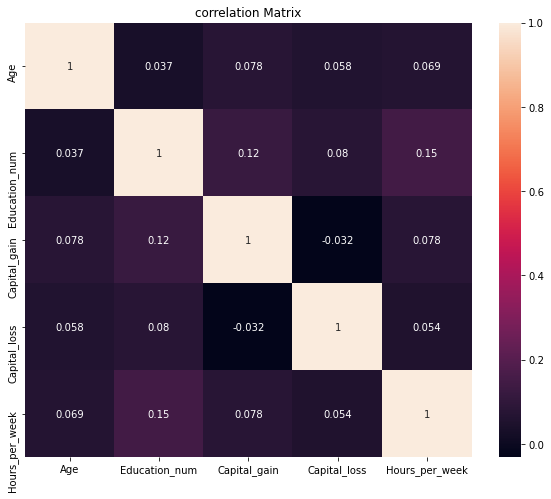

In [25]:
corr_mat=df.corr()   

plt.figure(figsize=[10,8])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show()

we can see that our target varaiable is not showing in the heatmap. It is happening because we have string values in class we need to labelEncode it first.

OBSERVATIONS:
    
    

# LabelEncoding

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [31]:
for i in df.columns:
    if df[i].dtypes== "object":
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [32]:
df

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,13,2,3,0,4,1,0,0,13,38,0
1,38,3,9,0,5,1,4,1,0,0,40,38,0
2,53,3,7,2,5,0,2,1,0,0,40,38,0
3,28,3,13,2,9,5,2,0,0,0,40,4,0
4,37,3,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,9,4,0,3,4,1,0,0,20,38,0


### Checking correlation again:

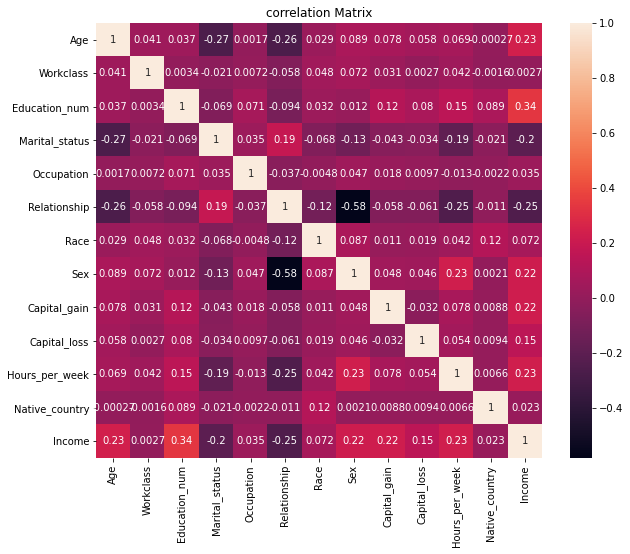

In [33]:
corr_mat=df.corr()   

plt.figure(figsize=[10,8])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show()

In [34]:
corr_matrix=df.corr()
corr_matrix["Income"].sort_values(ascending=False)

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Race              0.071853
Occupation        0.034599
Native_country    0.023063
Workclass         0.002739
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

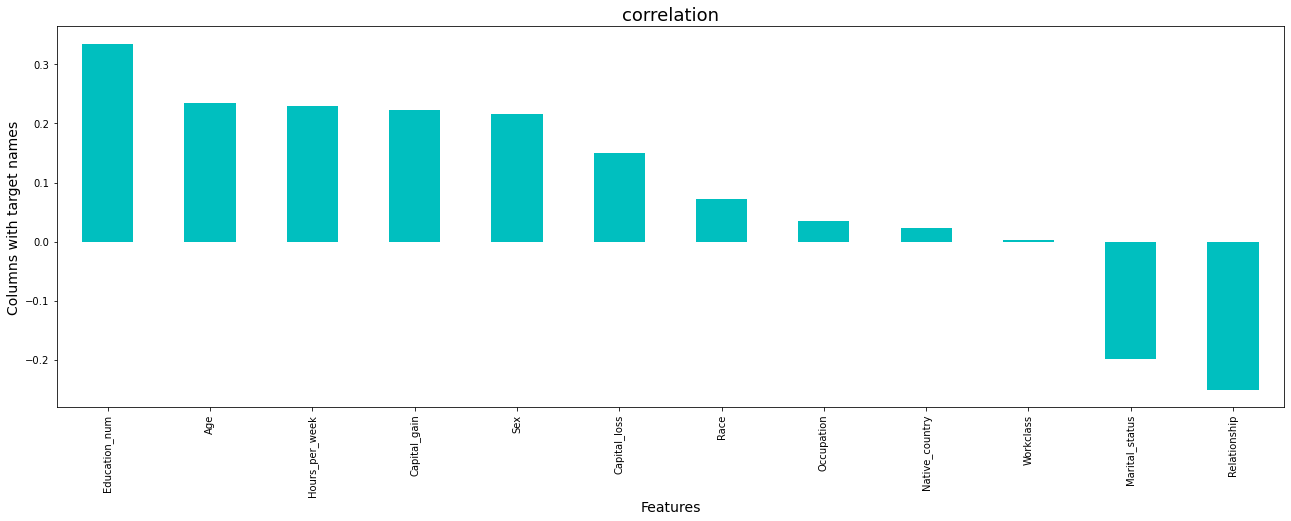

In [35]:
plt.figure(figsize=(22,7))
df.corr()["Income"].sort_values(ascending=False).drop(["Income"]).plot(kind="bar",color="c")
plt.xlabel("Features",fontsize=14)
plt.ylabel("Columns with target names", fontsize=14)
plt.title("correlation",fontsize=18)
plt.show

# Splitting the data into X & Y

In [36]:
x= df.drop("Income",axis=1)     # independent variable
y= df["Income"]                 # dependent variable

In [37]:
x.columns.size

12

In [38]:
x.columns

Index(['Age', 'Workclass', 'Education_num', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss',
       'Hours_per_week', 'Native_country'],
      dtype='object')

# SCALING

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

x=pd.DataFrame(scaler.fit_transform(x), columns= x.columns)

Now every column value is between 0 & 1. We can compare the data more accurately

In [40]:
x

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.452055,0.714286,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.122449,0.95
1,0.287671,0.428571,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.397959,0.95
2,0.493151,0.428571,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.000000,0.0,0.397959,0.95
3,0.150685,0.428571,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.000000,0.0,0.397959,0.10
4,0.273973,0.428571,0.866667,0.333333,0.230769,1.0,1.0,0.0,0.000000,0.0,0.397959,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.136986,0.428571,0.733333,0.333333,0.923077,1.0,1.0,0.0,0.000000,0.0,0.377551,0.95
32556,0.315068,0.428571,0.533333,0.333333,0.461538,0.0,1.0,1.0,0.000000,0.0,0.397959,0.95
32557,0.561644,0.428571,0.533333,1.000000,0.000000,0.8,1.0,0.0,0.000000,0.0,0.397959,0.95
32558,0.068493,0.428571,0.533333,0.666667,0.000000,0.6,1.0,1.0,0.000000,0.0,0.193878,0.95


# TREATING OUTLIERS

<function matplotlib.pyplot.show(*args, **kw)>

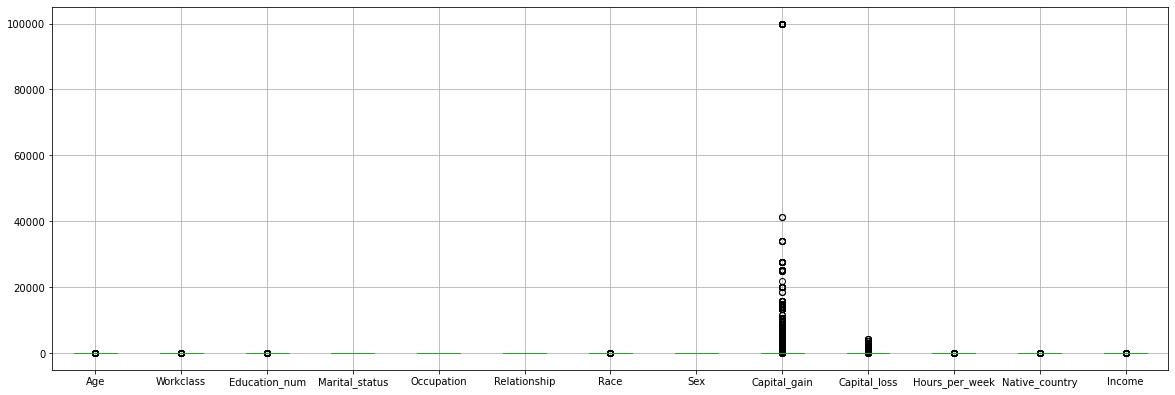

In [41]:
df.iloc[:,0:13].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show

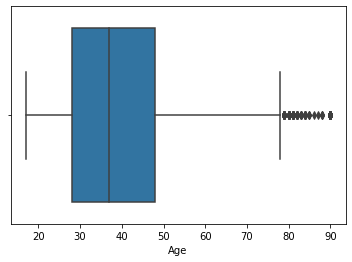

In [42]:
sns.boxplot(df["Age"])

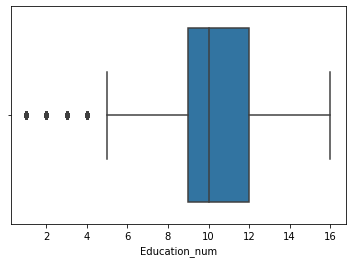

In [43]:
sns.boxplot(df["Education_num"])

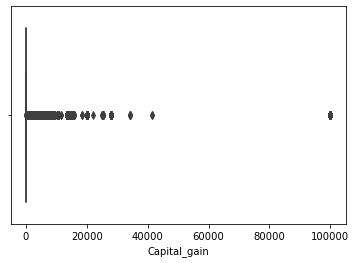

In [44]:
sns.boxplot(df["Capital_gain"])

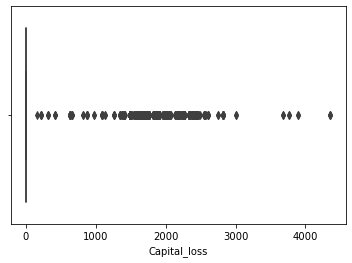

In [45]:
sns.boxplot(df["Capital_loss"])

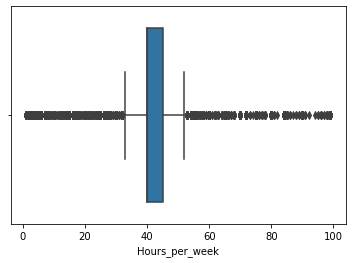

In [46]:
sns.boxplot(df["Hours_per_week"])

##### OUTLIERS are present in our dataset

In [47]:
# importing z score

from scipy.stats import zscore
z= np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64),
 array([11, 10,  6, ...,  6,  6,  6], dtype=int64))

In [48]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,13,2,3,0,4,1,0,0,13,38,0
1,38,3,9,0,5,1,4,1,0,0,40,38,0
2,53,3,7,2,5,0,2,1,0,0,40,38,0
4,37,3,14,2,3,5,4,0,0,0,40,38,0
5,49,3,5,3,7,1,2,0,0,0,16,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,9,4,0,3,4,1,0,0,20,38,0


In [49]:
df_new_z.shape

(28081, 13)

In [50]:
df.shape

(32560, 13)

In [51]:
Data_loss=((32560-28081)/32560)*100

In [52]:
Data_loss

13.756142506142508

##### we are lossing 14% of our data.

we will not use df_new_z. As our predictions will be baised with this dataset

# Checking Skweness

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.

If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.

If the skewness is less than -1 or greater than 1, the data are highly skewed

In [53]:
x.skew()

Age                0.558738
Workclass          0.076178
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.243083
dtype: float64

Skewness is present in Captial_gain & captial_loss.

In [55]:
## treating skewness

from sklearn.preprocessing import power_transform
x_new=power_transform(x)

x_new=pd.DataFrame(x_new,columns=x.columns)

# FINDING BEST RANDOM STATE

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

maxAccu=0
maxRS=0

for i in range (1,100):
    x_train,x_test,y_train,y_test= train_test_split(x_new,y,test_size=.30, random_state=i)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state", maxRS)

Best accuracy is 0.8319000819000819 on Random_state 22


Best Random state for our data in at 22 where we will get maximum Accuracy.

# CREATING TRAIN TEST SPLIT

In [57]:
### checking accuracy score and cross-validation score with different Algorithms

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [59]:
LR=LogisticRegression()
svc= SVC()
rf=RandomForestClassifier()
dtc=DecisionTreeClassifier()

In [60]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20, random_state=22)
for i in (LR, svc, dtc, rf):
    i.fit(x_train, y_train)
    
    pred = i.predict(x_test)
    
    print(i, accuracy_score(y_test,pred))

LogisticRegression() 0.8290847665847666
SVC() 0.8496621621621622
DecisionTreeClassifier() 0.8125
RandomForestClassifier() 0.851965601965602


# CROSS_VALIDATION_SCORE

In [61]:
from sklearn.model_selection import cross_val_score

for i in (LR, svc, dtc, rf):
    scr=cross_val_score(i,x,y,cv=5)
    print("cross validation score",i,"=", scr.mean()) 

cross validation score LogisticRegression() = 0.8228501228501228
cross validation score SVC() = 0.8456695331695332
cross validation score DecisionTreeClassifier() = 0.8134520884520885
cross validation score RandomForestClassifier() = 0.8515970515970516


#### We will proceed with RandomForestClassifier as it is giving highest accuracy_score and there is minimum difference between accuracy_score & cross_validation_score

# Hyperparameter tunning with best model

In [62]:
### importing GridSearchCV

from sklearn.model_selection import GridSearchCV

In [63]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':("gini", "entropy"), "max_features":["auto","sqrt","log2"]}

x_train,x_test,y_train,y_test= train_test_split(x_new,y,test_size=.30, random_state=22)

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'log2'}


In [64]:
clf_pred=clf.best_estimator_.predict(x_test)

In [65]:
accuracy_score(y_test,clf_pred)

0.8544226044226044

In [66]:
rf=RandomForestClassifier( criterion='entropy',  max_features='sqrt',  random_state=22)

In [67]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       random_state=22)

In [68]:
# AUC_ROC CURVE

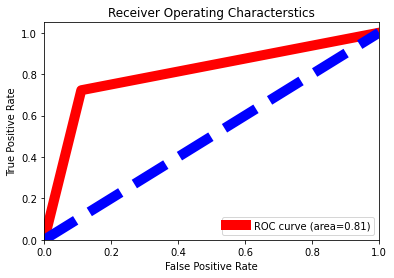

In [69]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(clf_pred,y_test)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,color="red",lw=10, label="ROC curve (area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color="blue", lw=10, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characterstics")
plt.legend(loc="lower right")
plt.show()

#### The area under curve is 81%

# SAVING OUR MODEL

In [70]:
import pickle
filename= "CensusIncome_rf.pkl"
pickle.dump(rf,open(filename,"wb"))

# LOAD THE MODEL

In [71]:
loaded_model=pickle.load(open("CensusIncome_rf.pkl","rb"))

result= loaded_model.score(x_test,y_test)
print(result)

0.852989352989353


# RESULT:

In [72]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],clf_pred[:]],index=["predicted","original"])

In [73]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,9758,9759,9760,9761,9762,9763,9764,9765,9766,9767
predicted,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
original,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
